## Project 5: The Demon Algorithm 

### Abstract and Description:
There are a number of approaches to complex problems involving large numbers of interactions where the objective is to find the "average" behavior of the system over a long period of time. In this project, we will use the Demon Algorithm to investigate the distribution of velocities of nitrogen molecules in a 1D gas and solve for the temperature of the system. To do so, we followed the algorithm described below and ended up with a Temperature of 206 K

### Algorithm and Discussion:
It's a simple way to simulate the random exchange of energy between components of a system over time. Here's the basic idea:

Suppose we have a demon..

1 Make a small change to the system.

2 Compute $\Delta E$. If $\Delta E<0$ give it to the “demon” and accept the change.

3 If $\Delta E>0$ and the demon has that much energy available, accept the change and take the energy from the demon.

4 If the demon doesn’t have that much energy, then reject the change.

$$ PE(v) = \frac{mv^2}{2} $$

### Implementation/ Code:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(array([ 986., 1043., 1011., 1041., 1004.,  986.,  966.,  990.,  970.,
        1003.]),
 array([-9.99938879e-01, -7.99948787e-01, -5.99958695e-01, -3.99968602e-01,
        -1.99978510e-01,  1.15818961e-05,  2.00001674e-01,  3.99991766e-01,
         5.99981858e-01,  7.99971951e-01,  9.99962043e-01]),
 <a list of 10 Patch objects>)

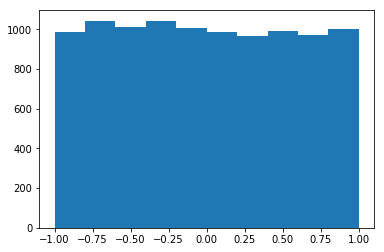

In [2]:
m  = 2*(2.33e-26)  # 2*(2.33e-26)/(1.78e-36)
g=9.8          # grav field strength
kbT=0.025    
kb=1.67e-23    # boltzman constant
demonE = 0.0   # initial demon energy
N=10000        # number of molecules
M=400000       # number of iterations
v0= 470        # Velocity Scale
v_x = (sqrt(2*kbT)/m)   #Speed at time t 


def setup(N=100,vscale=1.0):
    v_x=vscale*(rand(N)-0.5)*2     # put N particles at random heights (y) between 0 and L
    return v_x

v_xarray = setup(N=10000,vscale=1.0)
hist(v_xarray)

82.9545 percent accepted


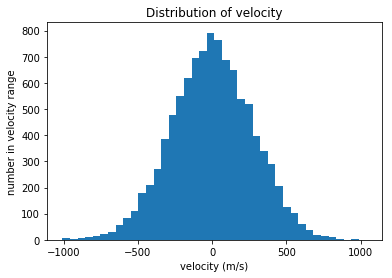

In [3]:
def shake(v_x, demonE, delta=0.1):
    """
    Pass in the current demon energy as an argument.
    delta is the size of change in y to generate, more or less.
    randomly choose a particle, change it's position slightly (around delta)
    return the new demon energy and a boolean (was the change accepted?)
    """
    ix = int(rand()*len(v_x))
    deltav_x = delta*normal()  
    KEi = ((v_x[ix]**2)*m*(1/2))
    KEf = (((v_x[ix]+deltav_x)**2)*m*(1/2))
    deltaE = KEf - KEi
    accept=False
    if deltaE < demonE:  
        demonE -= deltaE  
        v_x[ix] += deltav_x
        accept=True
    return demonE, accept

v_x = setup(N,vscale=v0)
acceptCount = 0
demonList = []
for i in range(M):
    demonE,accept = shake(v_x, demonE, delta=150)     
    demonList.append(demonE)
    if accept:
        acceptCount += 1

title("Distribution of velocity")
xlabel("velocity (m/s)")
ylabel("number in velocity range")
hist(v_x,bins=40)
print(100.0*acceptCount/M, "percent accepted")


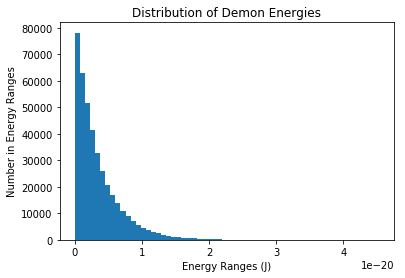

In [4]:
#
# Build a histogram of Demon Energies
#

title("Distribution of Demon Energies")
xlabel("Energy Ranges (J)")
ylabel("Number in Energy Ranges")
ns, bins, patches = hist(demonList, bins=60)


##### Demonic Thermometer
We can easily see that the demon acts like an small thermometer. According to the Maxwell-Boltzmann distribution the energy distribution of the demon's energy should go like:

$$P(E) = P_0 e^{-E/k_B T}$$
Where $P_0$ is the basically the probability of having an energy of zero. (Actually, maybe a better way to think of it is as a normalization constant that's determined by the requirement that the total probability to have any energy is 1.0). The histogram of demon energies tells us the number of times the demon have various values of energy during the calculation. This is proportional to the probability that the demon had various energies. We can fit that probability to an exponential curve (or the log of the probability to a straight line) and from the slope of the line deduce the temperature!

To do so, we will use Curve fitting, which is the process of constructing a curve, or mathematical function, that has the best fit to a series of data points, possibly subject to constraints.
See below how the code does exactly this.

In [5]:
ns

array([7.8133e+04, 6.2953e+04, 5.1429e+04, 4.1395e+04, 3.2759e+04,
       2.5973e+04, 2.0822e+04, 1.7029e+04, 1.3931e+04, 1.0894e+04,
       8.9920e+03, 7.0360e+03, 5.6600e+03, 4.6060e+03, 3.6280e+03,
       2.8680e+03, 2.3790e+03, 1.8480e+03, 1.5260e+03, 1.2160e+03,
       9.9700e+02, 8.3400e+02, 6.3600e+02, 5.1900e+02, 3.4900e+02,
       2.6700e+02, 2.3100e+02, 1.8800e+02, 1.4400e+02, 1.1300e+02,
       7.7000e+01, 8.3000e+01, 5.5000e+01, 6.4000e+01, 5.3000e+01,
       4.7000e+01, 4.5000e+01, 2.9000e+01, 2.2000e+01, 2.4000e+01,
       1.1000e+01, 1.9000e+01, 2.1000e+01, 1.8000e+01, 7.0000e+00,
       1.4000e+01, 1.1000e+01, 7.0000e+00, 9.0000e+00, 8.0000e+00,
       1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
       4.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00])

slope= -2.894309398418483e+20 +/- 8.2035176397972e+17
intercept= 11.155873630529463 +/- 0.0039811682867279975
Temperature= 206.37528835699553 +/- 0.5849420657583955 K


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


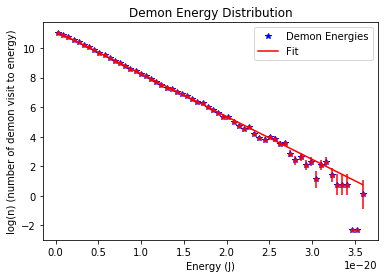

In [5]:

from scipy.optimize import curve_fit

def fLinear(x, ma, b):
    return ma*x + b

energies = (bins[:-1]+bins[1:])/2.0  
xvals = array(energies)  
yvals = log(array(ns)+.1)
sig = 1.0/sqrt(array(ns))  

m0 = (yvals[-1]-yvals[0])/(xvals[-1]-xvals[0])
b0 = yvals[0]-m0*xvals[0]

popt, pcov = curve_fit(fLinear, xvals, yvals, p0=(m0, b0), sigma=sig)

ma=popt[0]        
dm=sqrt(pcov[0,0]) 
b=popt[1]         
db=sqrt(pcov[1,1])

eavg = ((0.5*m*v_x**2).sum())/10000
Temp=(2 * eavg)/(kb)


dT = abs(dm*Temp/ma)
print("slope=", ma, "+/-", dm )
print("intercept=", b, "+/-", db)
print("Temperature=", Temp, "+/-", dT, "K")
title("Demon Energy Distribution")
xlabel("Energy (J)")
ylabel("log(n) (number of demon visit to energy)")
errorbar(xvals, yvals, sig, fmt='r.')
plot(xvals,yvals,'b*',label="Demon Energies")
plot(xvals,fLinear(xvals, ma, b),'r-', label="Fit")
legend()

### Results

   Just as expected, the logarithmic function of the data collected follows an almost-linear path and the curve-fitting function straight-line confirms our expectations. From 0J to $1.5x10^-20$ J, the error seems to be very negligible and it starts being considerably visible past that energy. That makes sense when you look at the Energy vs Number of molecules graph above. As it follows an exponential pattern, it decreases rapidly and once a certain point reached, the decreasing process becomes exponentially slow and arrives at zero only at infinity. In our case, that point seems to be near $1.5x10^-20$ J. Past that energy, the number of Nitrogen molecules is not enough to give an accurate estimation. That explains why the data are so jumpy around the straight-line past that energy point. On the other hand, it also means that if we dont' consider the data collected past that energy, the estimation would be very near perfect.

Using the covariance matrix given by the curve fitting function, we figured the error by taking the square roots of the diagonal entries of the matrix. The slope is also given by the same function.

Having all that allowed us to use physics principles, such as energy conservation to solve for the temperature. 

The temperature obtained is around $203.5 K$

In [6]:
curve_fitting(filter11b.iloc[:,0][0:10],filter11b['Latest: Position (m)'][0:10])

curve_fitting(filter12a.iloc[:,0][4:10],filter12a['Latest: Position (m)'][4:10])

curve_fitting(filter12b.iloc[:,0][0:6],filter12b['Latest: Position (m)'][0:6])

curve_fitting(filter13a.iloc[:,0][1:6],filter13a['Latest: Position (m)'][1:6])

curve_fitting(filter13b.iloc[:,0][1:9],filter13b['Latest: Position (m)'][1:9])

curve_fitting(filter14a.iloc[:,0][2:8],filter14a['Latest: Position (m)'][2:8])

curve_fitting(filter14b.iloc[:,0][0:6],filter14b['Latest: Position (m)'][0:6])

curve_fitting(filter15a.iloc[:,0][2:10],filter15a['Latest: Position (m)'][2:10])

curve_fitting(filter15b.iloc[:,0][2:8],filter15b['Latest: Position (m)'][2:8])

curve_fitting(filter16a.iloc[:,0][2:9],filter16a['Latest: Position (m)'][2:9])

curve_fitting(filter16b.iloc[:,0][4:11],filter16b['Latest: Position (m)'][4:11])

curve_fitting(filter17a.iloc[:,0][1:7],filter17a['Latest: Position (m)'][1:7])

curve_fitting(filter17b.iloc[:,0][1:9],filter17b['Latest: Position (m)'][1:9])

curve_fitting(filter18a.iloc[:,0][0:10],filter18a['Latest: Position (m)'][0:10])

curve_fitting(filter18b.iloc[:,0][0:6],filter18b['Latest: Position (m)'][0:6])

curve_fitting(filter19a.iloc[:,0][0:7],filter19a['Latest: Position (m)'][0:7])

curve_fitting(filter19b.iloc[:,0][1:7],filter19b['Latest: Position (m)'][1:7])

curve_fitting(filter20a.iloc[:,0][0:8],filter20a['Latest: Position (m)'][0:8])

curve_fitting(filter20b.iloc[:,0][0:7],filter20b['Latest: Position (m)'][0:7])


NameError: name 'curve_fitting' is not defined

### Conclusion
Altogether, the temperature obtained for this system must be correct. Looking at the 83 percent of the accepted Energy by the demon, it would be safe to conclude that our experiment gave good numbers at the end.